<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/CLASIFICACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#0.- Librerias 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split

from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
drive.mount('/content/drive')



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



Mounted at /content/drive


In [ ]:
!pip uninstall scikit-learn -y
!pip install -U pycaret scikit-learn

import pycaret
print('Using PyCaret Version', pycaret.__version__)
print('Path to PyCaret: ', pycaret.__file__)

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 264 kB 28.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 108 kB 69.2 MB/s 
     |████████████████████████████████| 1.7 MB 47.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 30.7 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 167 kB 55.1 MB/s 
     |████████████████████████████████| 271 kB 50.9 MB/s 
     |████████████████████████████████| 248 kB 51.2 MB/s 
     |████████████████████████████████| 6.8 MB 49.2 MB/s 
     |████████████████████████████████| 14.4 MB 6

Using PyCaret Version 2.3.3
Path to PyCaret:  /usr/local/lib/python3.7/dist-packages/pycaret/__init__.py


In [ ]:
!pip install shap


     |████████████████████████████████| 356 kB 28.8 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491656 sha256=fc6e7a4bf4dcc76cd4006e6fe40811effc7c7ed5b14d7ffa28d86823cb3948dd
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

In [ ]:
#path='/content/drive/My Drive/PROYECTO DATA SCIENCE/Data/DATA DRIVE.xlsx'
#data = pd.read_excel(path,sheet_name='EDAD Y GENERO')
path='DATA DRIVE.xlsx'
data = pd.read_excel(path,sheet_name='EDAD Y GENERO')

** Funciones para graficar en el dash**

In [ ]:
def boxplot(x,y,**kwargs):
    sns.boxplot(x=x,y=y)
    x=plt.xticks(rotation=90)
#train es el data frame
#count el conteo
#categorical_cols la lista de variables categoricas
#variable es la etiqueta adicional a poner en el grafico

#esta parte ponerla mas abajo reemplazando con los dataframe nuestros
#f=pd.melt(train,id_vars=['count'],value_vars=categorical_cols)
#g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
#g.map(boxplot,'value','count')

In [ ]:
#graficar las columnas numericas en solo dolor
#lista de columnas numericas  numerical_cols
#sns.pairplot(train[[*numerical_cols,'count']])

In [ ]:
# graficar dos tipos de grafico de barras de las categorias
# pasas la columna de las categorias en eje x
def graficar_categorias_vs_objetivo(data, x_col, y_col, tipo_grafico) :
  import plotly.express as px
  if (len(tipo_grafico) >= 1 and tipo_grafico[0] == 1)  :
    fig2 = px.histogram(data, x=x_col, y=y_col, histfunc='sum', height=300,
                        title='Histograma')
    fig2.show()
  if (len(tipo_grafico) >= 2 and tipo_grafico[0] == 1)  :  
    fig1 = px.bar(data, x=x_col, y=y_col, height=300,
                  title='Grafico barras apiladas - Hover on individual items')
    fig1.show()

In [ ]:
def dibujar_box_plot(datos, x_col, y_col, orientacion) :
     sns.boxplot(y= datos[x_col] , x= datos[y_col], orient=orientacion)

# ejemplo 
# dibujar_box_plot(data, 'Costperon-Facebooklead', 'Clasificacion', 'v')     

In [ ]:
def graficar_countplot ( datos, x_col, y_col, paleta ) :
  chart = sns.countplot(x=x_col, data=datos, palette=paleta)
  chart.set_xticklabels(chart.get_xticklabels(), fontsize=7)
  chart.set(xlabel=x_col, ylabel=y_col)
  plt.show()

# 0.- Transformacion y limpieza

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             3031 non-null   int64  
 1   Year & month                     3031 non-null   object 
 2   Month                            3031 non-null   int64  
 3   Campaign ID                      3031 non-null   int64  
 4   Campaign name                    3031 non-null   object 
 5   Campaign objective               3031 non-null   object 
 6   Ad set ID                        3031 non-null   int64  
 7   Ad set name                      3031 non-null   object 
 8   Ad ID                            3031 non-null   int64  
 9   Ad name                          3031 non-null   object 
 10  Promoted post type               3031 non-null   object 
 11  Promoted post created date       3031 non-null   int64  
 12  Promoted post descri

Eliminar NA

In [ ]:
filter1 = data.Year == 2021  
filter2 = data.Age != 'unknown'
filter3 = data.Gender != 'unknown'
filter4 = data["Campaign objective"] == "LEAD_GENERATION"

##filter3 = df_inicial.Month.isin([4,5,6,7])  
data = data[  filter1 & filter2 & filter3 & filter4 ]
data.head(5)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead
0,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,female,0.00,4,4,1.00,0,0,0.00,NaN
1,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,0.10,69,56,1.23,0,0,1.45,NaN
2,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,0.19,18,18,1.00,0,0,10.56,NaN
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32
4,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,0.04,17,13,1.31,0,0,2.35,NaN


In [ ]:
data=data.dropna(subset = ["Cost per on-Facebook lead"])
data=data.dropna(subset = ["Promoted post description"])

In [ ]:
missing_values_count = data.isnull().sum()
missing_values_count[0:43]

Year                                 0
Year & month                         0
Month                                0
Campaign ID                          0
Campaign name                        0
Campaign objective                   0
Ad set ID                            0
Ad set name                          0
Ad ID                                0
Ad name                              0
Promoted post type                   0
Promoted post created date           0
Promoted post description            0
Promoted post message                0
Promoted post caption                0
Ad set start time                    0
Ad set end time                    472
Ad set targeting                     0
Targeting minimum age                0
Targeting maximum age                0
Age                                  0
Gender                               0
Cost                                 0
Impressions                          0
Reach                                0
Frequency                

Etiquetado Manual 

In [ ]:
data =data.dropna(subset=["Cost per on-Facebook lead"])
q1= np.percentile(data["Cost per on-Facebook lead"], 25)  
q2= np.percentile(data["Cost per on-Facebook lead"], 50)
q3= np.percentile(data["Cost per on-Facebook lead"], 75) 

data['Clasificacion'] = "Ninguno"
data['ClasificacionDes'] = 'Ninguno'
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']<= q1)] = 2  #"Mejores"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = 1 # "Regulares"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q3 )] = 0 #"Peores"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']<= q1)] = "Mejores"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = "Regulares"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q3 )] = "Peores"

data['Clasificacion']= data['Clasificacion'].astype('int')


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

**Caracteristicas o variables predictoras calculados**

In [ ]:
data['Descripcion'] = data['Promoted post description'] 
data['Message'] = data['Promoted post message'] 
data['Caption'] = data['Promoted post caption'] 
data['NumDescripcion'] = data.Descripcion.str.split().str.len()
data['NumMessage'] = data.Message.str.split().str.len()
data['NumCaption'] = data.Caption.str.split().str.len()

In [ ]:
data['Rate'] = data['Unique leads']/data['Reach'] 
data['CTR'] = data['Link clicks']/data['Impressions'] 

In [ ]:
data.head(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,2,Mejores,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2,25,6,0.005181,0.013274
13,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,Regulares,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2,48,2,0.001188,0.003038


**Creacion de variables categoricas del campo intereses y nivel educacion**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data['intereses'] = '0' 
#data['education_statuses'] = '0'

data['ComprasOnline'] = '0'
data['Seguridad'] = '0'
data['SeguridadAlarmas'] = '0'
data['DispositivoInteligente'] = '0'
data['DispositivosGPS'] = '0'
data['SmartTechnologies'] = '0'
data['TarjetasCredito'] = '0'
data['Transporte'] = '0'
data['Vehiculos'] = '0'
#data['ServicioTecnico'] ='0'
ComprasOnline = ['Compras online']
Seguridad = ['Seguridad', 'Security', 'Sistema de alarma']
SeguridadAlarmas = ['Anti-theft system', 'Security alarm', 'Sistema de alarma']
DispositivoInteligente = ['Dispositivo inteligente']
DispositivosGPS = ['Dispositivos GPS','GPS Asistido','Conducción','Google Maps','Vehicle tracking system']
SmartTechnologies = ['Smart Technologies']
TarjetasCredito = ['Tarjetas de crédito']
Vehiculos = ['Sector automotor','Vehículos','Automóviles','Carros','Chevrolet','Dispositivos GPS','Honda','Mantenimiento preventivo','Motocicletas','Seguridad vial','Tarjetas de crédito','Toyota','Volkswagen']
Transporte = ['Transporte']
#ServicioTecnico = ['Servicios técnicos y de TI']
#education_statuses = ['10']

for i in data.index:

  #if (i == 3):
    campo_json = json.loads(data.loc[i]['Ad set targeting'])
    #print(campo_json)
    #hay registros que no tienen en el json el flexible_spec
    try:
        lista_intereses = pd.get_dummies(pd.json_normalize( campo_json ,record_path=['flexible_spec','interests'],errors='ignore').rename(columns={'name': 'interes'})['interes']).columns.values.tolist()
        #lista_educacion = pd.json_normalize(cuack_json,record_path=['flexible_spec'],errors='ignore')['education_statuses'][0]
        cadena_interes = '| ' + ''.join([  str( item + ' | ') for item in lista_intereses ])
        #print(cadena_interes)
        #cadena_educacion = '| ' + ''.join([  str( str(item) + ' | ') for item in lista_educacion ])
        data['intereses'][data.index == i] = cadena_interes

        if any(x in cadena_interes  for x in ComprasOnline) :
             data['ComprasOnline'][data.index == i] = '1'
        else :
             data['ComprasOnline'][data.index == i] = '0'

        if any(x in cadena_interes for x in Seguridad ) :
             data['Seguridad'][data.index == i] = '1'
        else :
             data['Seguridad'][data.index == i] = '0'

        if any(x in cadena_interes  for x in SeguridadAlarmas) :
             data['SeguridadAlarmas'][data.index == i] = '1'
        else :
             data['SeguridadAlarmas'][data.index == i] = '0'

        if any(x in cadena_interes  for x in DispositivoInteligente ) :
             data['DispositivoInteligente'][data.index == i] = '1'
        else :
             data['DispositivoInteligente'][data.index == i] = '0'

        if any(x in cadena_interes  for x in DispositivosGPS ) :
             data['DispositivosGPS'][data.index == i] = '1'
        else :
             data['DispositivosGPS'][data.index == i] = '0'

        if any(x in cadena_interes  for x in SmartTechnologies ) :
             data['SmartTechnologies'][data.index == i] = '1'
        else :
             data['SmartTechnologies'][data.index == i] = '0'

        if any(x in cadena_interes  for x in TarjetasCredito ) :
             data['TarjetasCredito'][data.index == i] = '1'
        else :
             data['TarjetasCredito'][data.index == i] = '0'

        if any(x in cadena_interes  for x in Transporte ) :
             data['Transporte'][data.index == i] = '1'
        else :
             data['Transporte'][data.index == i] = '0'

        if any(x in cadena_interes  for x in Vehiculos ) :
             data['Vehiculos'][data.index == i] = '1'
        else :
             data['Vehiculos'][data.index == i] = '0'


        #if any(x in education_statuses for x in cadena_educacion) :
        #     data['education_statuses'][data.index == i] = '1'
        #else :
        #     data['education_statuses'][data.index == i] = '0'


    except:
        #print('no entra')
        data.loc[i]['intereses'] = '0' 
        #data.loc[i]['education_statuses'] = '0' 
        data.loc[i]['ComprasOnline'] = '0'
        data.loc[i]['Seguridad'] = '0'
        data.loc[i]['SeguridadAlarmas'] = '0'
        data.loc[i]['DispositivoInteligente'] = '0'
        data.loc[i]['DispositivosGPS'] = '0'
        data.loc[i]['SmartTechnologies'] = '0'
        data.loc[i]['TarjetasCredito'] = '0'
        data.loc[i]['Vehiculos'] = '0'
        data.loc[i]['Transporte'] = '0'
        


no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra
no entra


In [ ]:
#Transformar a enteros
#data['education_statuses'] = data['education_statuses'].astype('int')
data['ComprasOnline'] = data['ComprasOnline'].astype('int')
data['Seguridad'] = data['Seguridad'].astype('int')
data['SeguridadAlarmas'] = data['SeguridadAlarmas'].astype('int')
data['DispositivoInteligente'] = data['DispositivoInteligente'].astype('int')
data['DispositivosGPS'] = data['DispositivosGPS'].astype('int')
data['SmartTechnologies'] = data['SmartTechnologies'].astype('int')
data['TarjetasCredito'] = data['TarjetasCredito'].astype('int')
data['Vehiculos'] = data['Vehiculos'].astype('int')
data['Transporte'] = data['Transporte'].astype('int')


In [ ]:
np.unique (data['DispositivosGPS'])

array([0, 1])

In [ ]:
data.head(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR,intereses,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
3,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,2,Mejores,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2,25,6,0.005181,0.013274,| Anti-theft system | Compras online | Conducc...,1,1,1,1,1,1,1,1,1
13,2021,2021|01,1,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,Regulares,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2,48,2,0.001188,0.003038,| Anti-theft system | Compras online | Conducc...,1,1,1,1,1,1,1,1,1


# 1.-  AEDA

In [59]:
data.dtypes

Year                                 int64
Year & month                        object
Month                                int64
Campaign ID                          int64
Campaign name                       object
Campaign objective                  object
Ad set ID                            int64
Ad set name                         object
Ad ID                                int64
Ad name                             object
Promoted post type                  object
Promoted post created date           int64
Promoted post description           object
Promoted post message               object
Promoted post caption               object
Ad set start time                    int64
Ad set end time                    float64
Ad set targeting                    object
Targeting minimum age                int64
Targeting maximum age                int64
Age                                 object
Gender                              object
Cost                               float64
Impressions

In [ ]:
data.describe()

,Year,Month,Campaign ID,Ad set ID,Ad ID,Promoted post created date,Ad set start time,Ad set end time,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
count,476.0,476.000000,4.760000e+02,4.760000e+02,4.760000e+02,476.000000,476.000000,4.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,2021.0,4.193277,2.384593e+16,2.384635e+16,2.384679e+16,44334.901261,44175.512605,44364.0,22.432773,56.138655,14.374370,7330.718487,4224.294118,1.541786,41.088235,5.735294,2.322668,2.383256,1.002101,6.792017,34.491597,5.676471,0.004501,0.009135,0.808824,0.497899,0.428571,0.401261,0.525210,0.401261,0.888655,0.401261,0.915966
std,0.0,2.025219,1.680774e+11,7.915021e+11,6.676882e+11,33.310228,103.190605,0.0,1.454466,9.925072,25.172324,13626.452709,7092.997162,0.432234,67.071655,9.044294,1.575707,1.769113,0.706359,3.097167,10.284067,2.326134,0.018485,0.015230,0.393641,0.500522,0.495392,0.490669,0.499889,0.490669,0.314889,0.490669,0.277730
min,2021.0,1.000000,2.384591e+16,2.384591e+16,2.384591e+16,44272.000000,44118.000000,44364.0,18.000000,44.000000,0.020000,4.000000,3.000000,1.000000,1.000000,1.000000,0.750000,0.020000,0.000000,1.000000,1.000000,1.000000,0.000232,0.001137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,2.000000,2.384591e+16,2.384591e+16,2.384615e+16,44327.000000,44118.000000,44364.0,21.000000,44.000000,1.867500,807.750000,568.000000,1.230000,5.000000,1.000000,1.530000,1.277500,1.000000,5.000000,30.000000,4.000000,0.000947,0.004347,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2021.0,4.000000,2.384591e+16,2.384591e+16,2.384664e+16,44327.000000,44118.000000,44364.0,23.000000,65.000000,4.920000,2607.500000,1696.500000,1.440000,15.000000,2.000000,1.955000,2.025000,1.000000,7.000000,31.000000,6.000000,0.001529,0.005932,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,2021.0,6.000000,2.384591e+16,2.384603e+16,2.384748e+16,44362.000000,44138.000000,44364.0,23.000000,65.000000,15.382500,8261.750000,5047.500000,1.712500,44.000000,6.000000,2.732500,3.100000,1.250000,7.000000,40.000000,7.000000,0.003013,0.009790,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2021.0,7.000000,2.384775e+16,2.384805e+16,2.384808e+16,44399.000000,44396.000000,44364.0,25.000000,65.000000,214.980000,147944.000000,67398.000000,3.900000,516.000000,68.000000,27.500000,11.390000,2.000000,12.000000,56.000000,9.000000,0.333333,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


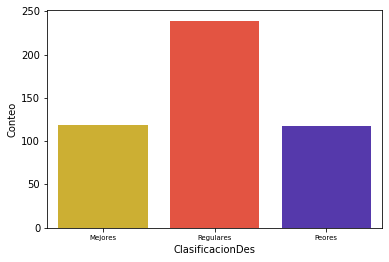

In [ ]:
#sns.countplot(x="Clasificacion", data=data, palette="bwr")
#plt.show()

graficar_countplot(data,'ClasificacionDes','Conteo','CMRmap_r')

In [ ]:
pd.unique(data['Promoted post type'])

array(['link'], dtype=object)

In [ ]:
all_features = ['Targeting minimum age', 'Targeting maximum age', 'Age', 'Gender','Cost', 'Impressions', 'Reach', 'Link clicks', 'Unique leads','CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR', 'education_statuses', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte']
categorical_columns_txt = ['Age', 'Gender']
categorical_columns_int = ['ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte','Vehiculos']
categorical_columns = ['Age', 'Gender', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte','Vehiculos']
numerical_columns = ['Targeting minimum age', 'Targeting maximum age','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR']
features_columns =  ['Targeting minimum age', 'Targeting maximum age','NumDescripcion', 'NumMessage', 'NumCaption', 'Rate','CTR','Age', 'Gender','education_statuses', 'ComprasOnline', 'Seguridad','SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS','SmartTechnologies', 'TarjetasCredito', 'Transporte']
labels = ['Clasificacion']

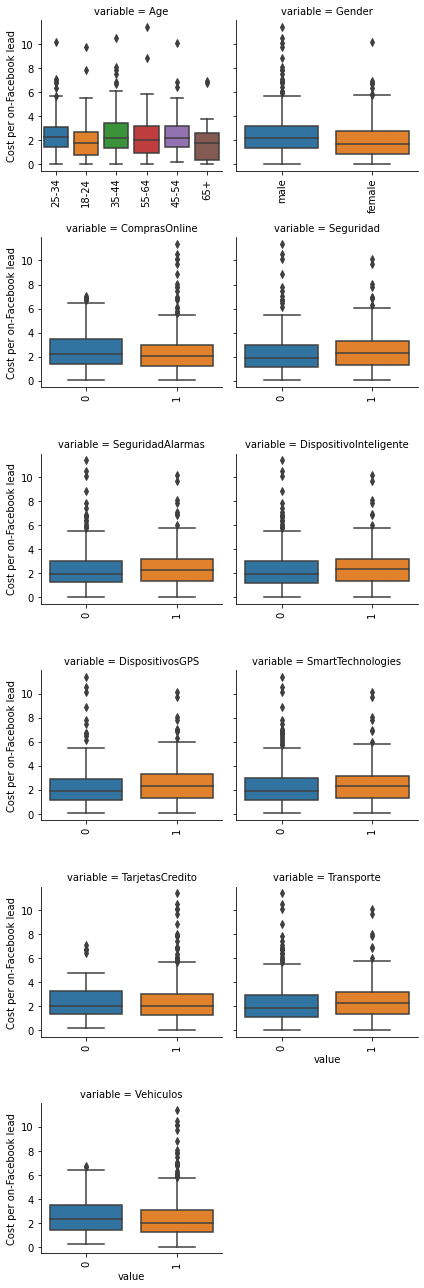

In [ ]:
f=pd.melt (data,id_vars=['Cost per on-Facebook lead'],value_vars=categorical_columns)
g=sns.FacetGrid(f,col='variable',col_wrap=2,sharex=False)
g.map(boxplot,'value','Cost per on-Facebook lead')

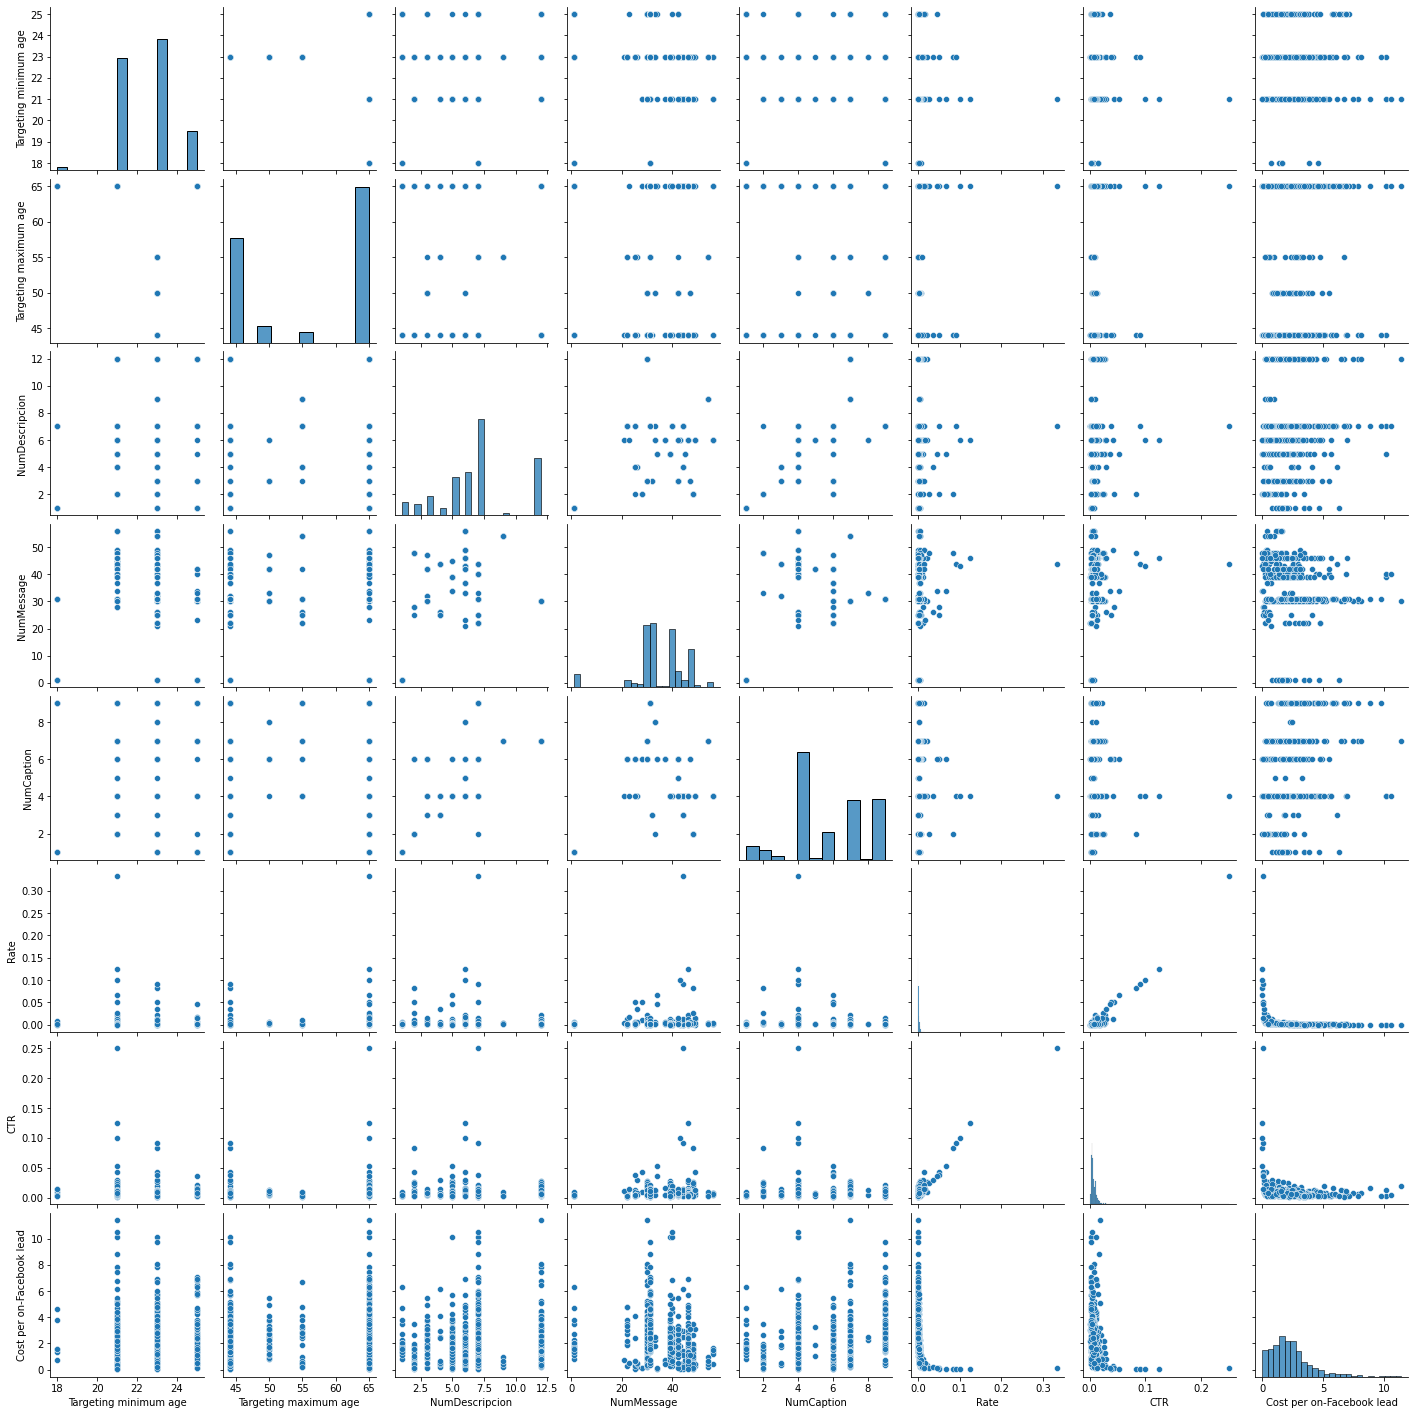

In [ ]:
sns.pairplot(data[[*numerical_columns,'Cost per on-Facebook lead']])

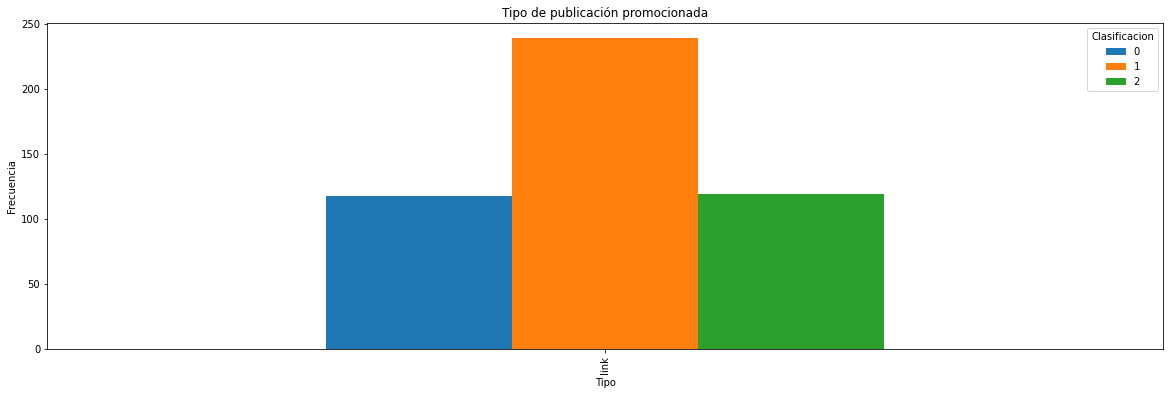

In [ ]:
pd.crosstab(data["Promoted post type"],data["Clasificacion"]).plot(kind="bar",figsize=(20,6))
plt.title('Tipo de publicación promocionada')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

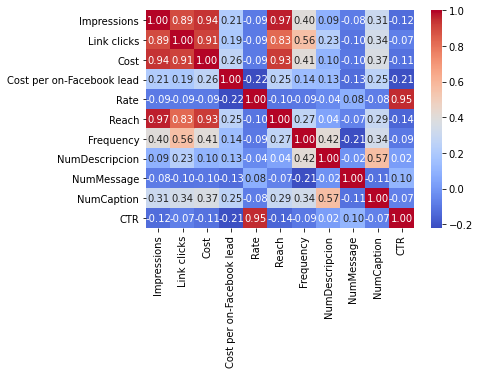

In [ ]:
numerical_columns = ["Impressions","Link clicks","Cost","Cost per on-Facebook lead","Rate","Reach","Frequency","NumDescripcion","NumMessage","NumCaption","CTR"]
g=sns.heatmap(data[numerical_columns].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

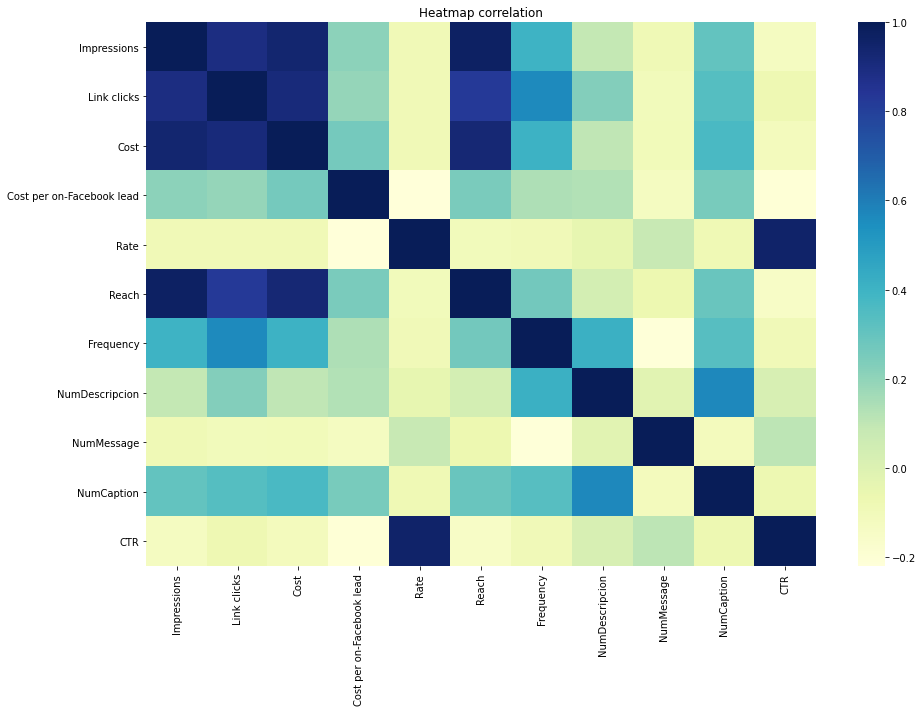

In [ ]:
import seaborn

df_corr = data[numerical_columns].corr() # Calculation of the correlation coefficients in pairs, with the default method:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") 
seaborn.set(font_scale=1,style='white')

plt.title('Heatmap correlation')
plt.show()

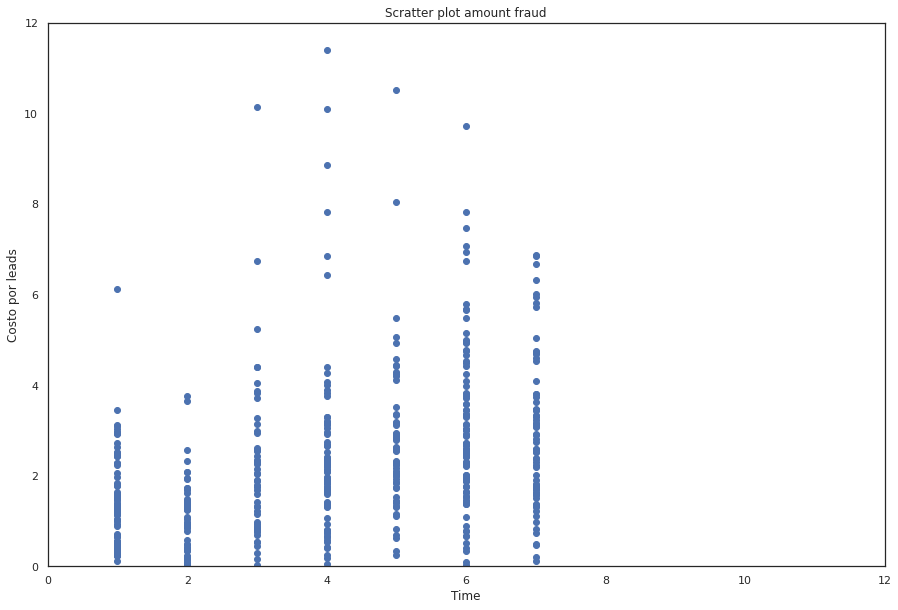

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data['Month'], data['Cost per on-Facebook lead']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Costo por leads')
plt.xlim([0,12])
plt.ylim([0,12])
plt.show()

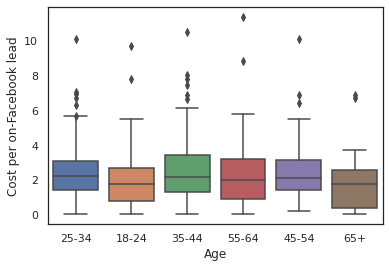

In [ ]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Age', 'v')

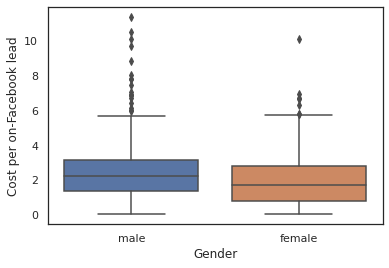

In [ ]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Gender', 'v')

# 2.- Seleccion de variables, data entrenamiento y test


In [ ]:
data.columns

Index(['Year', 'Year & month', 'Month', 'Campaign ID', 'Campaign name',
       'Campaign objective', 'Ad set ID', 'Ad set name', 'Ad ID', 'Ad name',
       'Promoted post type', 'Promoted post created date',
       'Promoted post description', 'Promoted post message',
       'Promoted post caption', 'Ad set start time', 'Ad set end time',
       'Ad set targeting', 'Targeting minimum age', 'Targeting maximum age',
       'Age', 'Gender', 'Cost', 'Impressions', 'Reach', 'Frequency',
       'Link clicks', 'Unique leads', 'CPM (cost per 1000 impressions)',
       'Cost per on-Facebook lead', 'Clasificacion', 'ClasificacionDes',
       'Descripcion', 'Message', 'Caption', 'NumDescripcion', 'NumMessage',
       'NumCaption', 'Rate', 'CTR', 'intereses', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos'],
      dtype='object')

In [ ]:
data['intereses'].unique()

array(['| Anti-theft system | Compras online | Conducción | Dispositivo inteligente | Dispositivos GPS | GPS Asistido | Google Maps | Security | Security alarm | Seguridad | Sistema de alarma | Smart Technologies | Tarjetas de crédito | Transporte | Vehicle tracking system | ',
       '| Business class | Compras online | Pequeñas empresas | Pequeñas y medianas empresas | Sector automotor | Tarjetas de crédito | Vehículos | Vehículos de lujo | Vehículos todoterreno | ',
       '| Anti-theft system | Carreras de motocicletas | Club de moteros | Dispositivos GPS | Google Maps | Harley-Davidson | Honda | Kawasaki motorcycles | Motero | Motocicleta crucero | Motocicleta custom | Motocicleta deportiva | Motocicletas | Motociclismo | Motorcycle accessories | Security alarm | Sistema de alarma | Suzuki | Unidad de seguimiento GPS | Vehicle tracking system | Waze | Yamaha Motor Company | ',
       '0',
       '| Anti-theft system | Dispositivos GPS | Rastreo Vehicular Automatizado | Unidad de s

In [ ]:
data.sample(2)

,Year,Year & month,Month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,ClasificacionDes,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR,intereses,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos
1494,2021,2021|04,4,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823950753,intereses_drive - amplio - 3 ciudades,23846640721000753,anuncio_1_drive_geocercas,link,44327,Dile adiós a la inseguridad con CarSync.,CarSync Drive te brinda una protección como ni...,Cuida tu vehículo desde la palma de tu mano.,44118,NaN,"{""age_max"":65,""age_min"":21,""excluded_custom_au...",21,65,25-34,male,43.66,28512,16963,1.68,113,22,1.53,1.98,1,Regulares,Dile adiós a la inseguridad con CarSync.,CarSync Drive te brinda una protección como ni...,Cuida tu vehículo desde la palma de tu mano.,7,31,9,0.001297,0.003963,| Business class | Compras online | Pequeñas e...,1,0,0,0,0,0,1,0,1
2912,2021,2021|07,7,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23848028271320753,Remarketing_Hubspot_TC,23848028282770753,anuncio_no_estas_en_nada_julio_16,link,44384,{{product.description}},{{product.brand}},{{product.name}},44393,NaN,"{""age_max"":65,""age_min"":18,""custom_audiences"":...",18,65,18-24,male,1.38,678,439,1.54,6,1,2.04,1.38,1,Regulares,{{product.description}},{{product.brand}},{{product.name}},1,1,1,0.002278,0.008850,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_original = data.copy()


In [ ]:

df= data.drop(['Year', 'Year & month', 'Campaign ID', 'Campaign name',
       'Campaign objective', 'Ad set ID', 'Ad set name', 'Ad ID', 'Ad name',
       'Promoted post type','Promoted post description', 'Promoted post message',
       'Promoted post caption', 'Ad set start time', 'Ad set end time',
       'Ad set targeting', 'Frequency', 'ClasificacionDes',
       'Descripcion', 'Message', 'Caption','Promoted post created date','intereses'], axis=1)


In [ ]:
df.columns

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Age',
       'Gender', 'Cost', 'Impressions', 'Reach', 'Link clicks', 'Unique leads',
       'CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead',
       'Clasificacion', 'NumDescripcion', 'NumMessage', 'NumCaption', 'Rate',
       'CTR', 'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos'],
      dtype='object')

In [ ]:
#df= data[["Month", "NumDescripcion","NumMessage","NumCaption","Targeting minimum age","Targeting maximum age","Age","Gender","Cost","Impressions","Reach","Link clicks","Unique leads","Cost per on-Facebook lead","Rate","CTR","Clasificacion"]]

Creating Dummy Variables¶


no es necesario aplicar esto cuando se tiene el pipeline, ver esta referencia para variables categoricas enteras, por tanto no era necesario cambiarlas a entero

https://www.it-swarm-es.com/es/python/preprocesamiento-de-funciones-de-variables-continuas-y-categoricas-de-tipo-entero-con-scikit-learn/830818857/

In [ ]:

a = pd.get_dummies(data['Gender'], prefix = "type")
b = pd.get_dummies(data['Age'], prefix = "type")

frames = [df,a,b]
df = pd.concat(frames, axis = 1)
df.head()
df = df.drop(columns = ['Gender','Age'])
df.head()

,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,1,23,44,0.32,226,193,3,1,1.42,0.32,2,2,25,6,0.005181,0.013274,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
13,1,23,44,4.60,4608,2525,14,3,1.00,1.53,1,2,48,2,0.001188,0.003038,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
15,1,23,44,3.67,1749,1172,4,2,2.10,1.84,1,2,48,2,0.001706,0.002287,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0
16,1,23,44,21.01,15951,9362,73,8,1.32,2.63,1,2,48,2,0.000855,0.004577,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
18,1,23,44,1.94,795,516,10,3,2.44,0.65,2,2,48,2,0.005814,0.012579,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 3 to 3023
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            476 non-null    int64  
 1   Targeting minimum age            476 non-null    int64  
 2   Targeting maximum age            476 non-null    int64  
 3   Cost                             476 non-null    float64
 4   Impressions                      476 non-null    int64  
 5   Reach                            476 non-null    int64  
 6   Link clicks                      476 non-null    int64  
 7   Unique leads                     476 non-null    int64  
 8   CPM (cost per 1000 impressions)  476 non-null    float64
 9   Cost per on-Facebook lead        476 non-null    float64
 10  Clasificacion                    476 non-null    int64  
 11  NumDescripcion                   476 non-null    int64  
 12  NumMessage           

In [ ]:
df.head(3)

,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,1,23,44,0.32,226,193,3,1,1.42,0.32,2,2,25,6,0.005181,0.013274,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0
13,1,23,44,4.60,4608,2525,14,3,1.00,1.53,1,2,48,2,0.001188,0.003038,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0
15,1,23,44,3.67,1749,1172,4,2,2.10,1.84,1,2,48,2,0.001706,0.002287,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0


Definicion de las variables 

In [ ]:
y = df.Clasificacion.values
x_data = df.drop(['Clasificacion'], axis = 1)

Normalizacion de la data 

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x


,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,0.0,0.714286,0.0,0.001396,0.001501,0.002819,0.003883,0.000000,0.025047,0.026385,0.090909,0.436364,0.625,0.014858,0.048770,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.0,0.714286,0.0,0.021306,0.031121,0.037421,0.025243,0.029851,0.009346,0.132806,0.090909,0.854545,0.125,0.002869,0.007639,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.714286,0.0,0.016980,0.011795,0.017346,0.005825,0.014925,0.050467,0.160070,0.090909,0.854545,0.125,0.004426,0.004620,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,0.0,0.714286,0.0,0.097646,0.107794,0.138868,0.139806,0.104478,0.021308,0.229551,0.090909,0.854545,0.125,0.001868,0.013820,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
18,0.0,0.714286,0.0,0.008932,0.005347,0.007612,0.017476,0.029851,0.063178,0.055409,0.090909,0.854545,0.125,0.016757,0.045975,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,1.0,1.000000,1.0,0.048055,0.046843,0.082736,0.046602,0.029851,0.027664,0.301671,0.545455,0.545455,1.000,0.000917,0.009918,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2965,1.0,1.000000,1.0,0.022051,0.018933,0.035285,0.031068,0.014925,0.035514,0.207564,0.545455,0.545455,1.000,0.001824,0.019784,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2968,1.0,1.000000,1.0,0.014561,0.009903,0.017301,0.029126,0.014925,0.052336,0.137203,0.545455,0.545455,1.000,0.004439,0.039196,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3019,1.0,1.000000,1.0,0.000419,0.000466,0.000905,0.000000,0.000000,0.028411,0.007916,0.181818,0.745455,0.375,0.046210,0.050475,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

Data entrenamiento y de test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
#x_train.info()

# 3.- Creacion de modelos


## 3.0.- Pycaret

https://www.kaggle.com/sureshmecad/pycaret-automl-beginers

https://www.kaggle.com/frtgnn/pycaret-introduction-classification-regression

In [ ]:
train, test = train_test_split(df,test_size = 0.2,random_state=0)

In [ ]:
from pycaret.classification import *

In [ ]:
train.columns

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Cost',
       'Impressions', 'Reach', 'Link clicks', 'Unique leads',
       'CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead',
       'Clasificacion', 'NumDescripcion', 'NumMessage', 'NumCaption', 'Rate',
       'CTR', 'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos', 'type_female',
       'type_male', 'type_18-24', 'type_25-34', 'type_35-44', 'type_45-54',
       'type_55-64', 'type_65+'],
      dtype='object')

In [ ]:
clf1 = setup(data =train, 
             target = 'Clasificacion',
            # numeric_imputation = 'mean'),
            #categorical_features = ['Gender','Age'])
            ignore_features = ['Cost per on-Facebook lead','Unique leads'])
            # silent = True)       


,Description,Value
0,session_id,834
1,Target,Clasificacion
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(380, 33)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# Comparar modelos
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8715,0.9499,0.8669,0.8865,0.8694,0.7939,0.8028,0.064
gbc,Gradient Boosting Classifier,0.8375,0.9391,0.8292,0.8615,0.8343,0.7375,0.7491,0.299
ada,Ada Boost Classifier,0.7852,0.9173,0.7386,0.8207,0.7711,0.6336,0.6601,0.089
dt,Decision Tree Classifier,0.7818,0.8219,0.7843,0.8071,0.7823,0.6522,0.6636,0.016
rf,Random Forest Classifier,0.7739,0.9043,0.7295,0.8082,0.7618,0.6194,0.6423,0.460
knn,K Neighbors Classifier,0.6571,0.7514,0.6305,0.6847,0.6550,0.4420,0.4519,0.118
et,Extra Trees Classifier,0.6452,0.8072,0.5928,0.6521,0.6242,0.3982,0.4132,0.456
lr,Logistic Regression,0.5919,0.7039,0.5344,0.5496,0.5419,0.3100,0.3315,0.280
lda,Linear Discriminant Analysis,0.5513,0.6847,0.5164,0.5659,0.5422,0.2651,0.2726,0.018
ridge,Ridge Classifier,0.5288,0.0000,0.4771,0.5448,0.5100,0.2158,0.2257,0.014


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=834, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python
https://github.com/see-ecuador/MLProductivo/blob/main/diabetes.ipynb

In [ ]:
# Mejor modelo 
lr_model  = create_model('lr')      

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.7878,0.6891,0.6971,0.6986,0.5284,0.5296
1,0.6667,0.7454,0.5716,0.7580,0.6253,0.4145,0.4693
2,0.5556,0.6734,0.4524,0.4580,0.4951,0.1920,0.2129
3,0.5185,0.5971,0.4689,0.3845,0.4414,0.1986,0.2195
4,0.6667,0.7947,0.6154,0.7479,0.6139,0.4375,0.4769
5,0.5000,0.7091,0.4652,0.3969,0.4387,0.1776,0.1878
6,0.5769,0.6109,0.4945,0.4701,0.5149,0.2610,0.2829
7,0.4615,0.5843,0.4396,0.3743,0.4015,0.1395,0.1510
8,0.5385,0.6839,0.4689,0.4330,0.4795,0.2061,0.2197
9,0.7308,0.8528,0.6789,0.7764,0.7101,0.5450,0.5656


https://github.com/pycaret/pycaret/issues/516

In [ ]:
# Ajuste
tuned_lr = tune_model(lr_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.8041,0.6891,0.7037,0.7037,0.5304,0.5304
1,0.6667,0.7436,0.5716,0.7580,0.6253,0.4145,0.4693
2,0.5926,0.6746,0.5000,0.4854,0.5309,0.2721,0.2941
3,0.5185,0.6013,0.4689,0.3845,0.4414,0.1986,0.2195
4,0.6667,0.8135,0.6154,0.7479,0.6139,0.4375,0.4769
5,0.5000,0.6882,0.4951,0.4738,0.4708,0.2047,0.2112
6,0.6154,0.6001,0.5201,0.4818,0.5361,0.3158,0.3582
7,0.5000,0.6407,0.4872,0.3950,0.4285,0.2009,0.2175
8,0.5769,0.6977,0.5165,0.4607,0.5123,0.2832,0.2992
9,0.7308,0.8469,0.6789,0.7764,0.7101,0.5450,0.5656


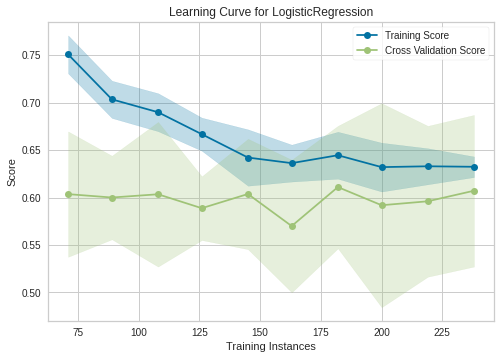

In [ ]:
#Learning Curve
plot_model(estimator = tuned_lr, plot = 'learning')


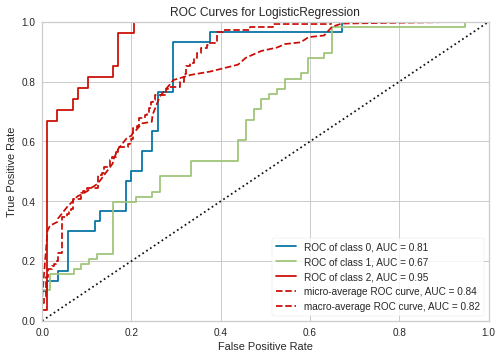

In [ ]:
# AUC Curve
plot_model(estimator = tuned_lr, plot = 'auc')



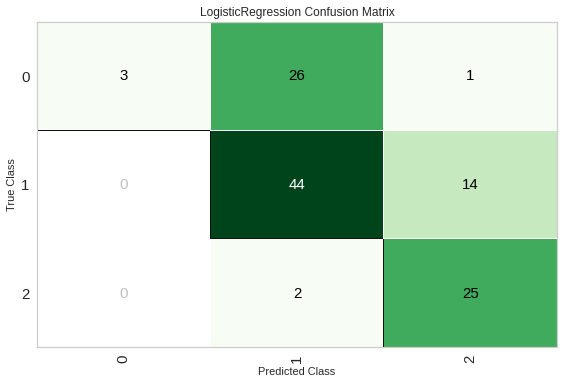

In [ ]:
#Confusion Matrix

plot_model(estimator = tuned_lr, plot = 'confusion_matrix')


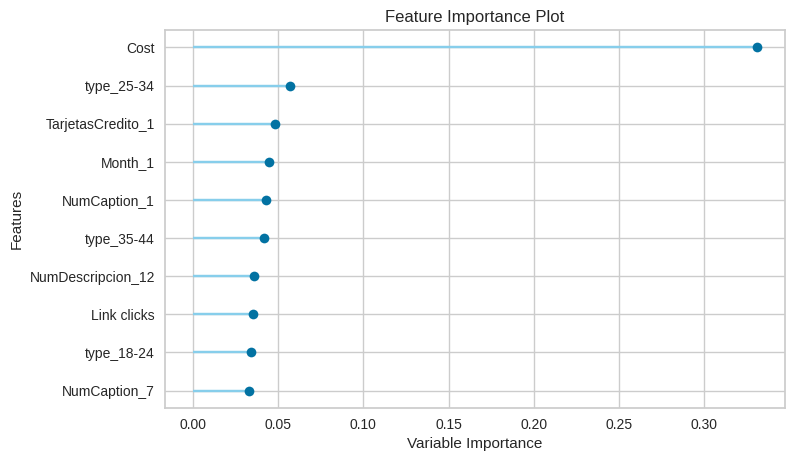

In [ ]:
#Feature Importance

plot_model(estimator = tuned_lr, plot = 'feature')


In [ ]:
#Evaluar

evaluate_model(tuned_lr)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#Interpretation
import shap

#interpret_model(tuned_lr)
#This function only supports tree based models for binary classification: dt, lightgbm, et, rf.

In [ ]:
#Predecir
predict_model(tuned_lr, data=test)


,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,0.80,341,224,5,1,2.35,0.80,2,12,30,7,0.004464,0.014663,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.5054
1192,3,21,65,57.53,21057,9272,254,28,2.73,2.05,1,12,30,7,0.003020,0.012062,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.7997
1852,5,21,65,2.10,808,544,4,1,2.60,2.10,1,12,30,7,0.001838,0.004950,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.4700
2102,6,21,65,11.48,4420,2953,24,3,2.60,3.83,0,12,30,7,0.001016,0.005430,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.6313
632,2,21,65,8.64,7069,5656,34,8,1.22,1.08,2,5,39,4,0.001414,0.004810,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.5907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,4,23,44,40.08,16202,8048,167,15,2.47,2.67,1,12,30,7,0.001864,0.010307,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0.7329
2569,7,23,44,3.48,3747,2624,5,1,0.93,3.48,0,7,22,6,0.000381,0.001334,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,1,0.5085
2826,7,23,55,6.68,5288,2669,17,2,1.26,3.34,0,7,22,6,0.000749,0.003215,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0.5933
2390,6,25,65,0.52,72,56,1,1,7.22,0.52,2,6,23,4,0.017857,0.013889,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0.4144


In [ ]:
predictions = predict_model(tuned_lr, data=test)
predictions.head()

,Month,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte,Vehiculos,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+,Label,Score
1518,4,21,65,0.80,341,224,5,1,2.35,0.80,2,12,30,7,0.004464,0.014663,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,2,0.5054
1192,3,21,65,57.53,21057,9272,254,28,2.73,2.05,1,12,30,7,0.003020,0.012062,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0.7997
1852,5,21,65,2.10,808,544,4,1,2.60,2.10,1,12,30,7,0.001838,0.004950,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0.4700
2102,6,21,65,11.48,4420,2953,24,3,2.60,3.83,0,12,30,7,0.001016,0.005430,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.6313
632,2,21,65,8.64,7069,5656,34,8,1.22,1.08,2,5,39,4,0.001414,0.004810,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0.5907


## 3.1.- Uso de Sklearn

In [ ]:
!pip install kneed

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd 
import random
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import datetime
import seaborn as sns
import math 
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import plotly.graph_objs as go
import plotly as py
import plotly.express as px
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as pgo
import sklearn.model_selection as model_selection
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
import sklearn.model_selection as model_selection 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split




In [ ]:
!pip install sklearn-pandas
from sklearn_pandas import DataFrameMapper

In [ ]:
print(x_train.columns)
x_train_cp = x_train.drop(['Unique leads','Cost per on-Facebook lead'],axis=1 )
x_test_cp = x_test.drop(['Unique leads','Cost per on-Facebook lead'],axis=1 )
print(x_train_cp.columns)
print(x_test_cp.columns)


print(y_train.shape)
print(y_test.shape)

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Cost',
       'Impressions', 'Reach', 'Link clicks', 'Unique leads',
       'CPM (cost per 1000 impressions)', 'Cost per on-Facebook lead',
       'NumDescripcion', 'NumMessage', 'NumCaption', 'Rate', 'CTR',
       'ComprasOnline', 'Seguridad', 'SeguridadAlarmas',
       'DispositivoInteligente', 'DispositivosGPS', 'SmartTechnologies',
       'TarjetasCredito', 'Transporte', 'Vehiculos', 'type_female',
       'type_male', 'type_18-24', 'type_25-34', 'type_35-44', 'type_45-54',
       'type_55-64', 'type_65+'],
      dtype='object')
Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Cost',
       'Impressions', 'Reach', 'Link clicks',
       'CPM (cost per 1000 impressions)', 'NumDescripcion', 'NumMessage',
       'NumCaption', 'Rate', 'CTR', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'V

array([2, 1, 1, 0, 2, 2, 1, 0, 2, 1])

In [ ]:
print(type(x_train_cp))
print(x_train_cp)

#X = data_original.drop('Clasificacion', axis=1)

<class 'pandas.core.frame.DataFrame'>
         Month  Targeting minimum age  ...  type_55-64  type_65+
1351  0.500000               0.714286  ...         0.0       0.0
882   0.333333               0.714286  ...         0.0       0.0
1683  0.666667               0.714286  ...         0.0       0.0
321   0.000000               0.428571  ...         0.0       0.0
1288  0.500000               0.714286  ...         0.0       0.0
...        ...                    ...  ...         ...       ...
1909  0.833333               0.714286  ...         0.0       0.0
1341  0.500000               0.714286  ...         0.0       0.0
811   0.166667               1.000000  ...         0.0       0.0
223   0.000000               0.428571  ...         0.0       0.0
1280  0.500000               0.714286  ...         0.0       0.0

[380 rows x 30 columns]


In [ ]:
print(type(x_test_cp))
print(x_test_cp)

<class 'pandas.core.frame.DataFrame'>
         Month  Targeting minimum age  ...  type_55-64  type_65+
1518  0.500000               0.428571  ...         0.0       0.0
1192  0.333333               0.428571  ...         0.0       0.0
1852  0.666667               0.428571  ...         0.0       0.0
2102  0.833333               0.428571  ...         0.0       0.0
632   0.166667               0.428571  ...         0.0       0.0
...        ...                    ...  ...         ...       ...
1337  0.500000               0.714286  ...         0.0       0.0
2569  1.000000               0.714286  ...         0.0       0.0
2826  1.000000               0.714286  ...         0.0       0.0
2390  0.833333               1.000000  ...         0.0       0.0
1819  0.666667               0.428571  ...         0.0       0.0

[96 rows x 30 columns]


## 3.1.- Logistic regression multinomial



In [ ]:
# define the multinomial logistic regression model
model_lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_lg.fit(x_train_cp, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# get modelo
accuracies = {}

acc = model_lg.score(x_test_cp,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 51.04%


In [ ]:
# get importance
importances = model_lg.coef_[0]

In [ ]:
importances.shape

(30,)

In [ ]:
feature_names = x_train_cp.columns

In [ ]:
print(feature_names)
print(feature_names.shape)

Index(['Month', 'Targeting minimum age', 'Targeting maximum age', 'Cost',
       'Impressions', 'Reach', 'Link clicks',
       'CPM (cost per 1000 impressions)', 'NumDescripcion', 'NumMessage',
       'NumCaption', 'Rate', 'CTR', 'ComprasOnline', 'Seguridad',
       'SeguridadAlarmas', 'DispositivoInteligente', 'DispositivosGPS',
       'SmartTechnologies', 'TarjetasCredito', 'Transporte', 'Vehiculos',
       'type_female', 'type_male', 'type_18-24', 'type_25-34', 'type_35-44',
       'type_45-54', 'type_55-64', 'type_65+'],
      dtype='object')
(30,)


In [ ]:
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

In [ ]:
labels = np.array(feature_names)[sorted_index]


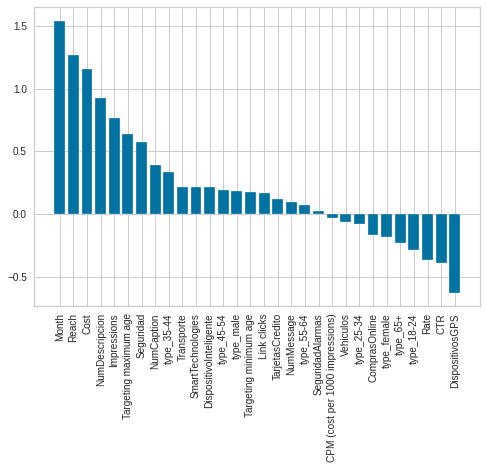

In [ ]:
plt.bar(x,importances[sorted_index],tick_label = labels)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# plot feature importance
# plt.figure(figsize = (13,5))
# plt.bar(list(x_train.columns), importance)
# plt.xticks(rotation = 90)
#plt.ylim((0,10)
#plt.show()

In [ ]:
model_lg.score(x_test_cp,y_test)

0.5104166666666666

In [ ]:
print( classification_report(y_train, model_lg.predict(x_train_cp)) )

              precision    recall  f1-score   support

           0       0.70      0.33      0.44        92
           1       0.58      0.83      0.69       189
           2       0.66      0.45      0.54        99

    accuracy                           0.61       380
   macro avg       0.65      0.54      0.56       380
weighted avg       0.63      0.61      0.59       380



Plot of a ROC

*******FIN VERSION ANTERIOR REGRESION LOGISTICA

In [ ]:
#lr.feature_importances
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


## 3.2.- Elastic Net

In [ ]:
accuracies = {}
enet = LogisticRegression(penalty= 'elasticnet', solver= 'saga', max_iter=500,l1_ratio=0.1)
enet.fit(x_train, y_train)
acc = enet.score(x_test,y_test)*100
accuracies['enet'] = acc
print("Test Accuracy of Elastic net Algorithm: {:.2f}%".format(acc))

Test Accuracy of Elastic net Algorithm: 75.00%


In [ ]:
# get importance
importance = enet.coef_[0]

# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train.columns), 'importance':importance})
display(df_imp.sort_values('importance', ascending=False).head(20))

,feature,importance
11,Cost per on-Facebook lead,6.587250
6,Cost,1.126956
8,Reach,0.952138
0,Month,0.916316
7,Impressions,0.759513
1,NumDescripcion,0.668065
9,Link clicks,0.509417
18,type_35-44,0.281768
5,Targeting maximum age,0.148895
4,Targeting minimum age,0.103533


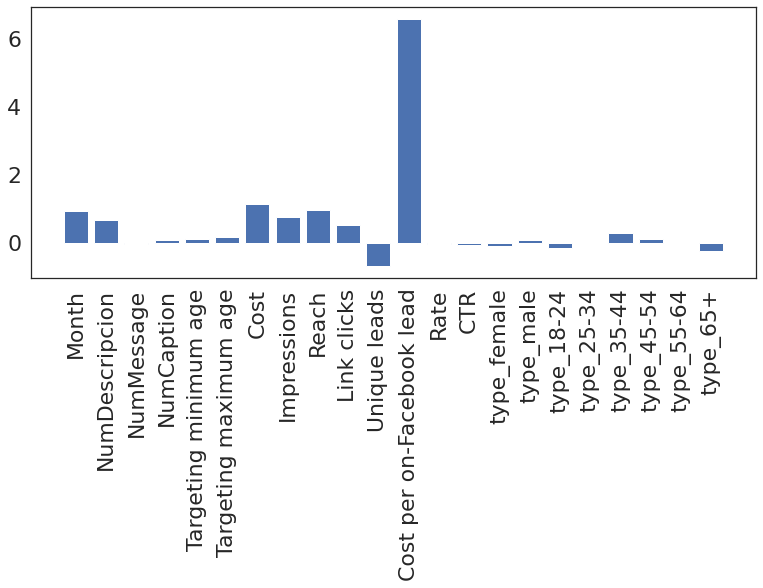

In [ ]:
# plot feature importance
plt.figure(figsize = (13,5))
plt.bar(list(x_train.columns), importance)
plt.xticks(rotation = 90)
#plt.ylim((0,10)
plt.show()

## 3.3.- Support Vector Machine (SVM) Algorithm


In [ ]:
from sklearn.svm import SVC

In [ ]:
x_train.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Month to type_65+
Columns: 380 entries, 1351 to 1280
dtypes: float64(380)
memory usage: 66.1+ KB


In [ ]:
accuracies = {}
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 61.46%


In [ ]:
type(svm)

sklearn.svm._classes.SVC

Plot of a ROC

## 3.4- KNN

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 48.96%


In [ ]:
# try ro find best k value
#  scoreList = []
#  for i in range(1,20):
#   knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
#  knn2.fit(x_train, y_train)
#   scoreList.append(knn2.score(x_test, y_test))
    
#  plt.plot(range(1,20), scoreList)
#  plt.xticks(np.arange(1,20,1))
# plt.xlabel("K value")
#  plt.ylabel("Score")
# plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

**texto en negrita**# 4.- Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.33%


## 3.5.- Decision Tree Algorithm



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


### Gini

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)
acc = clf_gini.score(x_test, y_test)*100
accuracies['Decision Tree gini'] = acc
print("Decision Tree Gini Test Accuracy {:.2f}%".format(acc))

#Compare the train-set and test-set accuracy

y_pred_gini = clf_gini.predict(x_test)
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))


Decision Tree Gini Test Accuracy 100.00%
Training set score: 1.0000
Test set score: 1.0000


[Text(133.92000000000002, 181.2, 'X[11] <= 0.11\ngini = 0.626\nsamples = 380\nvalue = [92, 189, 99]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 99\nvalue = [0, 0, 99]'),
 Text(200.88000000000002, 108.72, 'X[11] <= 0.271\ngini = 0.44\nsamples = 281\nvalue = [92, 189, 0]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 189\nvalue = [0, 189, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 92\nvalue = [92, 0, 0]')]

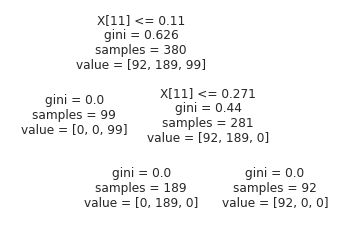

In [ ]:
# Visualize decision-trees


from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

### Entropy

In [ ]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(x_test)

#Check accuracy score with criterion entropy
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Model accuracy score with criterion entropy: 1.0000
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 1.0000


[Text(267.84000000000003, 362.4, 'X[11] <= 0.11\nentropy = 1.502\nsamples = 380\nvalue = [92, 189, 99]'),
 Text(133.92000000000002, 217.44, 'entropy = 0.0\nsamples = 99\nvalue = [0, 0, 99]'),
 Text(401.76000000000005, 217.44, 'X[11] <= 0.271\nentropy = 0.912\nsamples = 281\nvalue = [92, 189, 0]'),
 Text(267.84000000000003, 72.47999999999996, 'entropy = 0.0\nsamples = 189\nvalue = [0, 189, 0]'),
 Text(535.6800000000001, 72.47999999999996, 'entropy = 0.0\nsamples = 92\nvalue = [92, 0, 0]')]

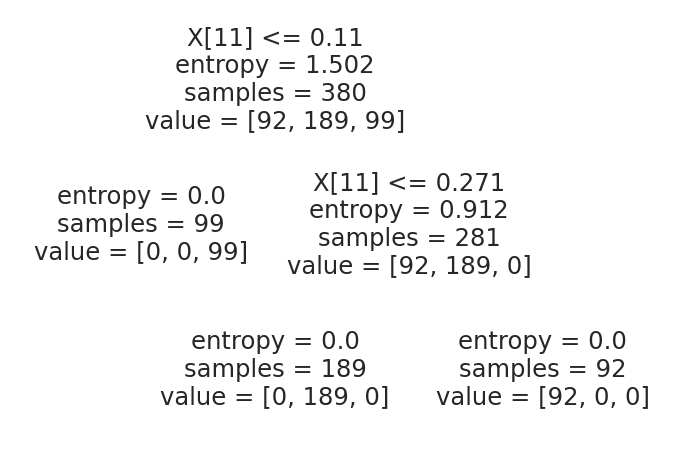

In [ ]:
#Visualize decision-trees

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 

Bibliografia
https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

## 3.6.-Random Forest Classification

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 98.96%


## 3.7.-Keras

In [ ]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(x_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()


In [ ]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 184       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 100
neural_pred = neural_model.fit(x_train, y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/100
11/11 - 1s - loss: 0.6827 - accuracy: 0.4123 - val_loss: 0.6316 - val_accuracy: 0.5000
Epoch 2/100
11/11 - 0s - loss: 0.6167 - accuracy: 0.4971 - val_loss: 0.5732 - val_accuracy: 0.5000
Epoch 3/100
11/11 - 0s - loss: 0.5676 - accuracy: 0.4971 - val_loss: 0.5203 - val_accuracy: 0.5000
Epoch 4/100
11/11 - 0s - loss: 0.5218 - accuracy: 0.4971 - val_loss: 0.4724 - val_accuracy: 0.5000
Epoch 5/100
11/11 - 0s - loss: 0.4818 - accuracy: 0.4971 - val_loss: 0.4273 - val_accuracy: 0.5000
Epoch 6/100
11/11 - 0s - loss: 0.4452 - accuracy: 0.4971 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 7/100
11/11 - 0s - loss: 0.4133 - accuracy: 0.4971 - val_loss: 0.3458 - val_accuracy: 0.5000
Epoch 8/100
11/11 - 0s - loss: 0.3811 - accuracy: 0.4971 - val_loss: 0.3113 - val_accuracy: 0.5000
Epoch 9/100
11/11 - 0s - loss: 0.3538 - accuracy: 0.4971 - val_loss: 0.2791 - val_accuracy: 0.5000
Epoch 10/100
11/11 - 0s - loss: 0.3275 - accuracy: 0.4971 - val_loss: 0.2502 - val_accuracy: 0.5000
Epoch 11/

In [ ]:
_, acc = neural_model.evaluate(x_test, y_test,
                            batch_size=64)
acc = acc *100
accuracies['Keras'] = acc
print("Keras Algorithm Accuracy Score : {:.2f}%".format(acc))

2/2 [==============================] - 0s 6ms/step - loss: 0.2703 - accuracy: 0.5208
Keras Algorithm Accuracy Score : 52.08%


Plot of a ROC

# 7.- Comparacion de modelos y eleccion del mejor

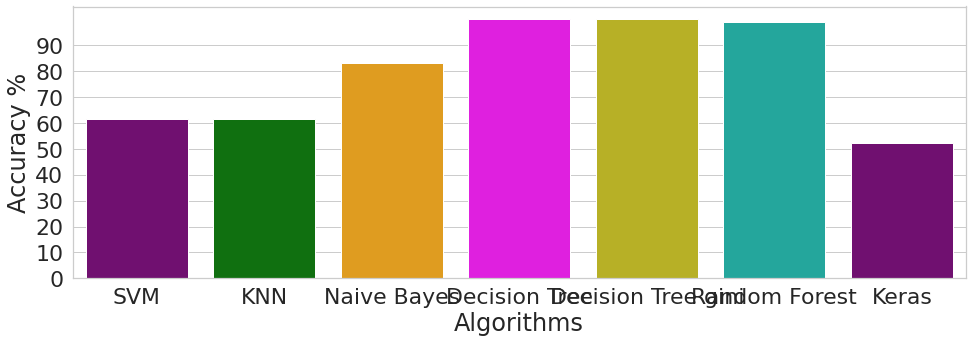

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

8.- Matrix de confusion 

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


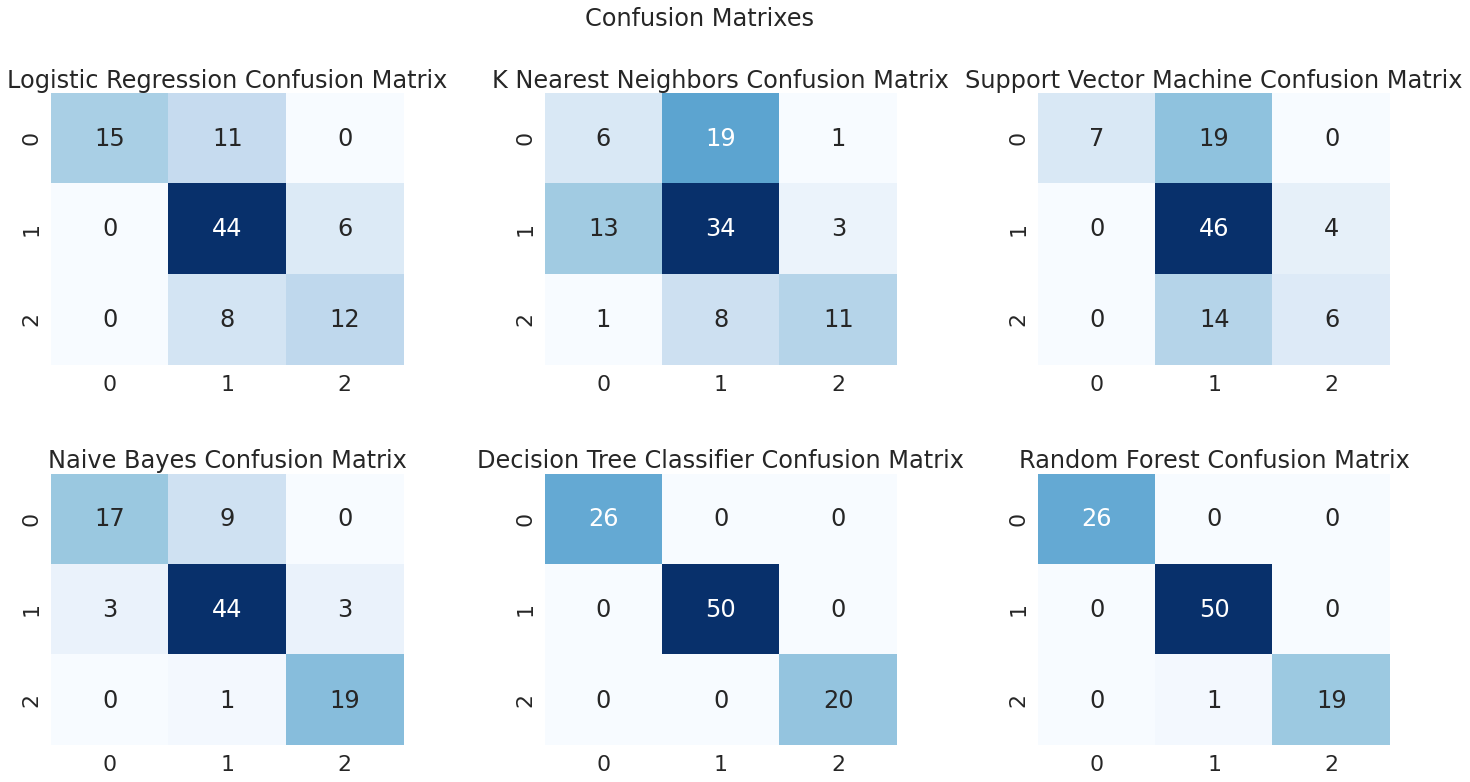

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

# 9.- Mejor modelo (Randon Forest)


## K Fold Cross Validation (Randon Forest)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python

In [ ]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_model, x_train, y_train, cv=10, scoring = "accuracy")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [1.         0.97368421 0.97368421 0.92105263 0.97368421 0.94736842
 1.         1.         0.97368421 1.        ]
Mean: 0.9763157894736842
Standard Deviation: 0.024826266136991074


## Feature Importance (Randon Forest)


https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.head(20)

,importance
feature,
Cost per on-Facebook lead,0.446
Cost,0.119
Rate,0.103
Reach,0.077
Impressions,0.070
Link clicks,0.042
Unique leads,0.029
CTR,0.027
Month,0.022


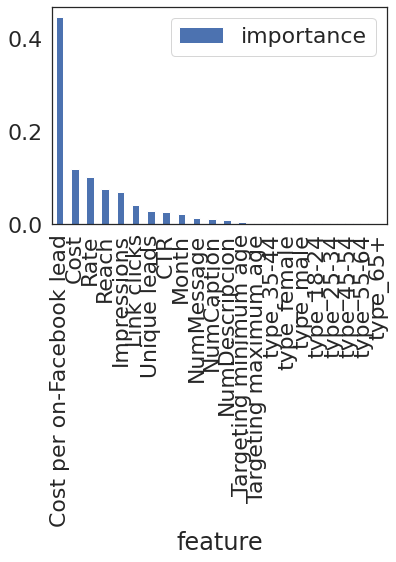

In [ ]:
importances.plot.bar()

In [ ]:
variables= ['Cost per on-Facebook lead','Targeting minimum age', 'Targeting maximum age', 'type_female', 'type_male', 'type_18-24', 'type_25-34',
       'type_35-44', 'type_45-54', 'type_55-64', 'type_65+']
x_train_t = x_train.drop(variables, axis=1)
x_test_t= x_test.drop(variables, axis=1)


In [ ]:
# Training random forest again:

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)


random_forest.score(x_train_t, y_train)


acc_random_forest = round(random_forest.score(x_train_t, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


100.0 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.95 %


## Hyperparameter Tuning

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)

random_forest.score(x_train_t, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.16 %


## Further Evaluation

In [ ]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train_t, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 90,   2,   0],
       [  0, 187,   2],
       [  0,   3,  96]])

In [ ]:
predictions 

In [ ]:
#Precision and Recal
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions,average=None))
print("Recall:",recall_score(y_train, predictions, average=None))

Precision: [1.         0.97395833 0.97959184]
Recall: [0.97826087 0.98941799 0.96969697]


In [ ]:
# F-Score
from sklearn.metrics import f1_score
f1_score(y_train, predictions, average=None)

array([0.98360656, 0.97894737, 0.97461929])

In [ ]:
#Precision Recall Curv
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train_t)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)